<a href="https://www.kaggle.com/code/pragyamukherjee/alzheimer-s-disease-classification?scriptVersionId=124229324" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Import dataset**

In [1]:
import numpy as np
import pandas as pd
long_data = pd.read_csv("/kaggle/input/mri-and-alzheimers/oasis_longitudinal.csv")

**Read dataset**

In [2]:
long_data.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
long_data.info()
long_data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


<bound method NDFrame.describe of     Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV   

In [4]:
long_data["Hand"].unique()

array(['R'], dtype=object)

In [5]:
long_data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
long_data["SES"].fillna(long_data["SES"].mean(), inplace = True)
long_data["MMSE"].fillna(long_data["MMSE"].mean(), inplace = True)

In [7]:
long_data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [8]:
long_data.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             6
MMSE           19
CDR             4
eTIV          286
nWBV          136
ASF           265
dtype: int64

In [9]:
#long_data["Hand"].unique()
#long_data["Visit"].unique()
long_data["Group"].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [10]:
long_data.corr()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,1.000000,0.920009,0.183213,0.024615,-0.050422,-0.029020,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.920009,1.000000,0.205357,0.051630,-0.030258,0.065786,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.046665,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.024615,0.051630,-0.027886,1.000000,-0.708680,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.050422,-0.030258,-0.046665,-0.708680,1.000000,-0.146913,0.073393,-0.254271,0.089436,0.246673
MMSE,-0.029020,0.065786,0.055607,0.194454,-0.146913,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,0.002325,-0.062915,-0.026257,-0.153121,0.073393,-0.679837,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.117428,0.119624,0.042348,0.257015,-0.254271,-0.031789,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.126682,-0.105586,-0.518359,-0.012200,0.089436,0.341857,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.120399,-0.123545,-0.035067,-0.241752,0.246673,0.039494,-0.029340,-0.988877,0.213476,1.000000


In [11]:
long_data.drop(columns = ["Subject ID","MRI ID","Hand","Visit"], inplace = True)

In [12]:
long_data.rename(columns={"M/F" : "Gender"}, inplace=True)

**Plots**

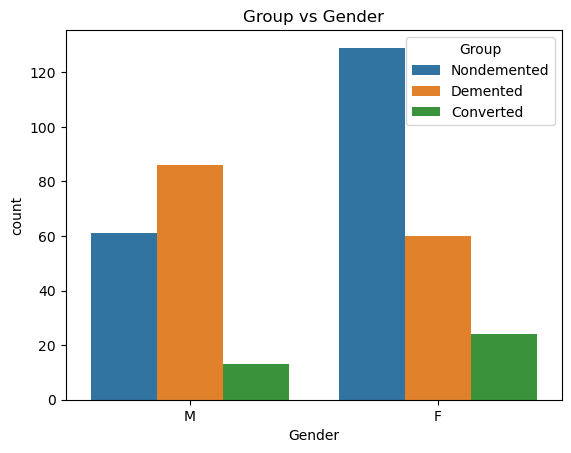

In [13]:
from matplotlib import pyplot as plt

import seaborn as sns

sns.countplot(x = long_data.Gender, data = long_data, hue = "Group")
plt.title("Group vs Gender")
plt.show()

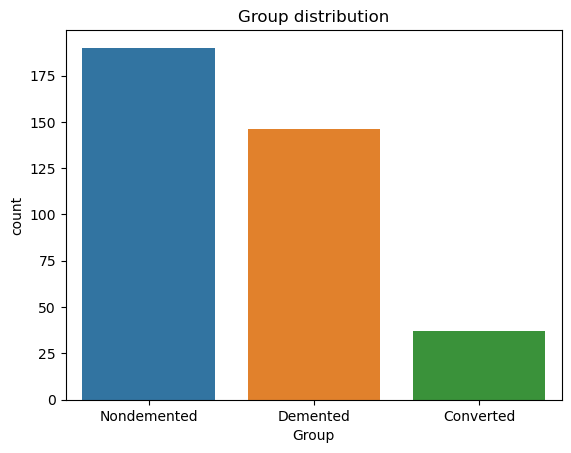

In [14]:
sns.countplot(x = long_data.Group, data = long_data)
plt.title("Group distribution")
plt.show()

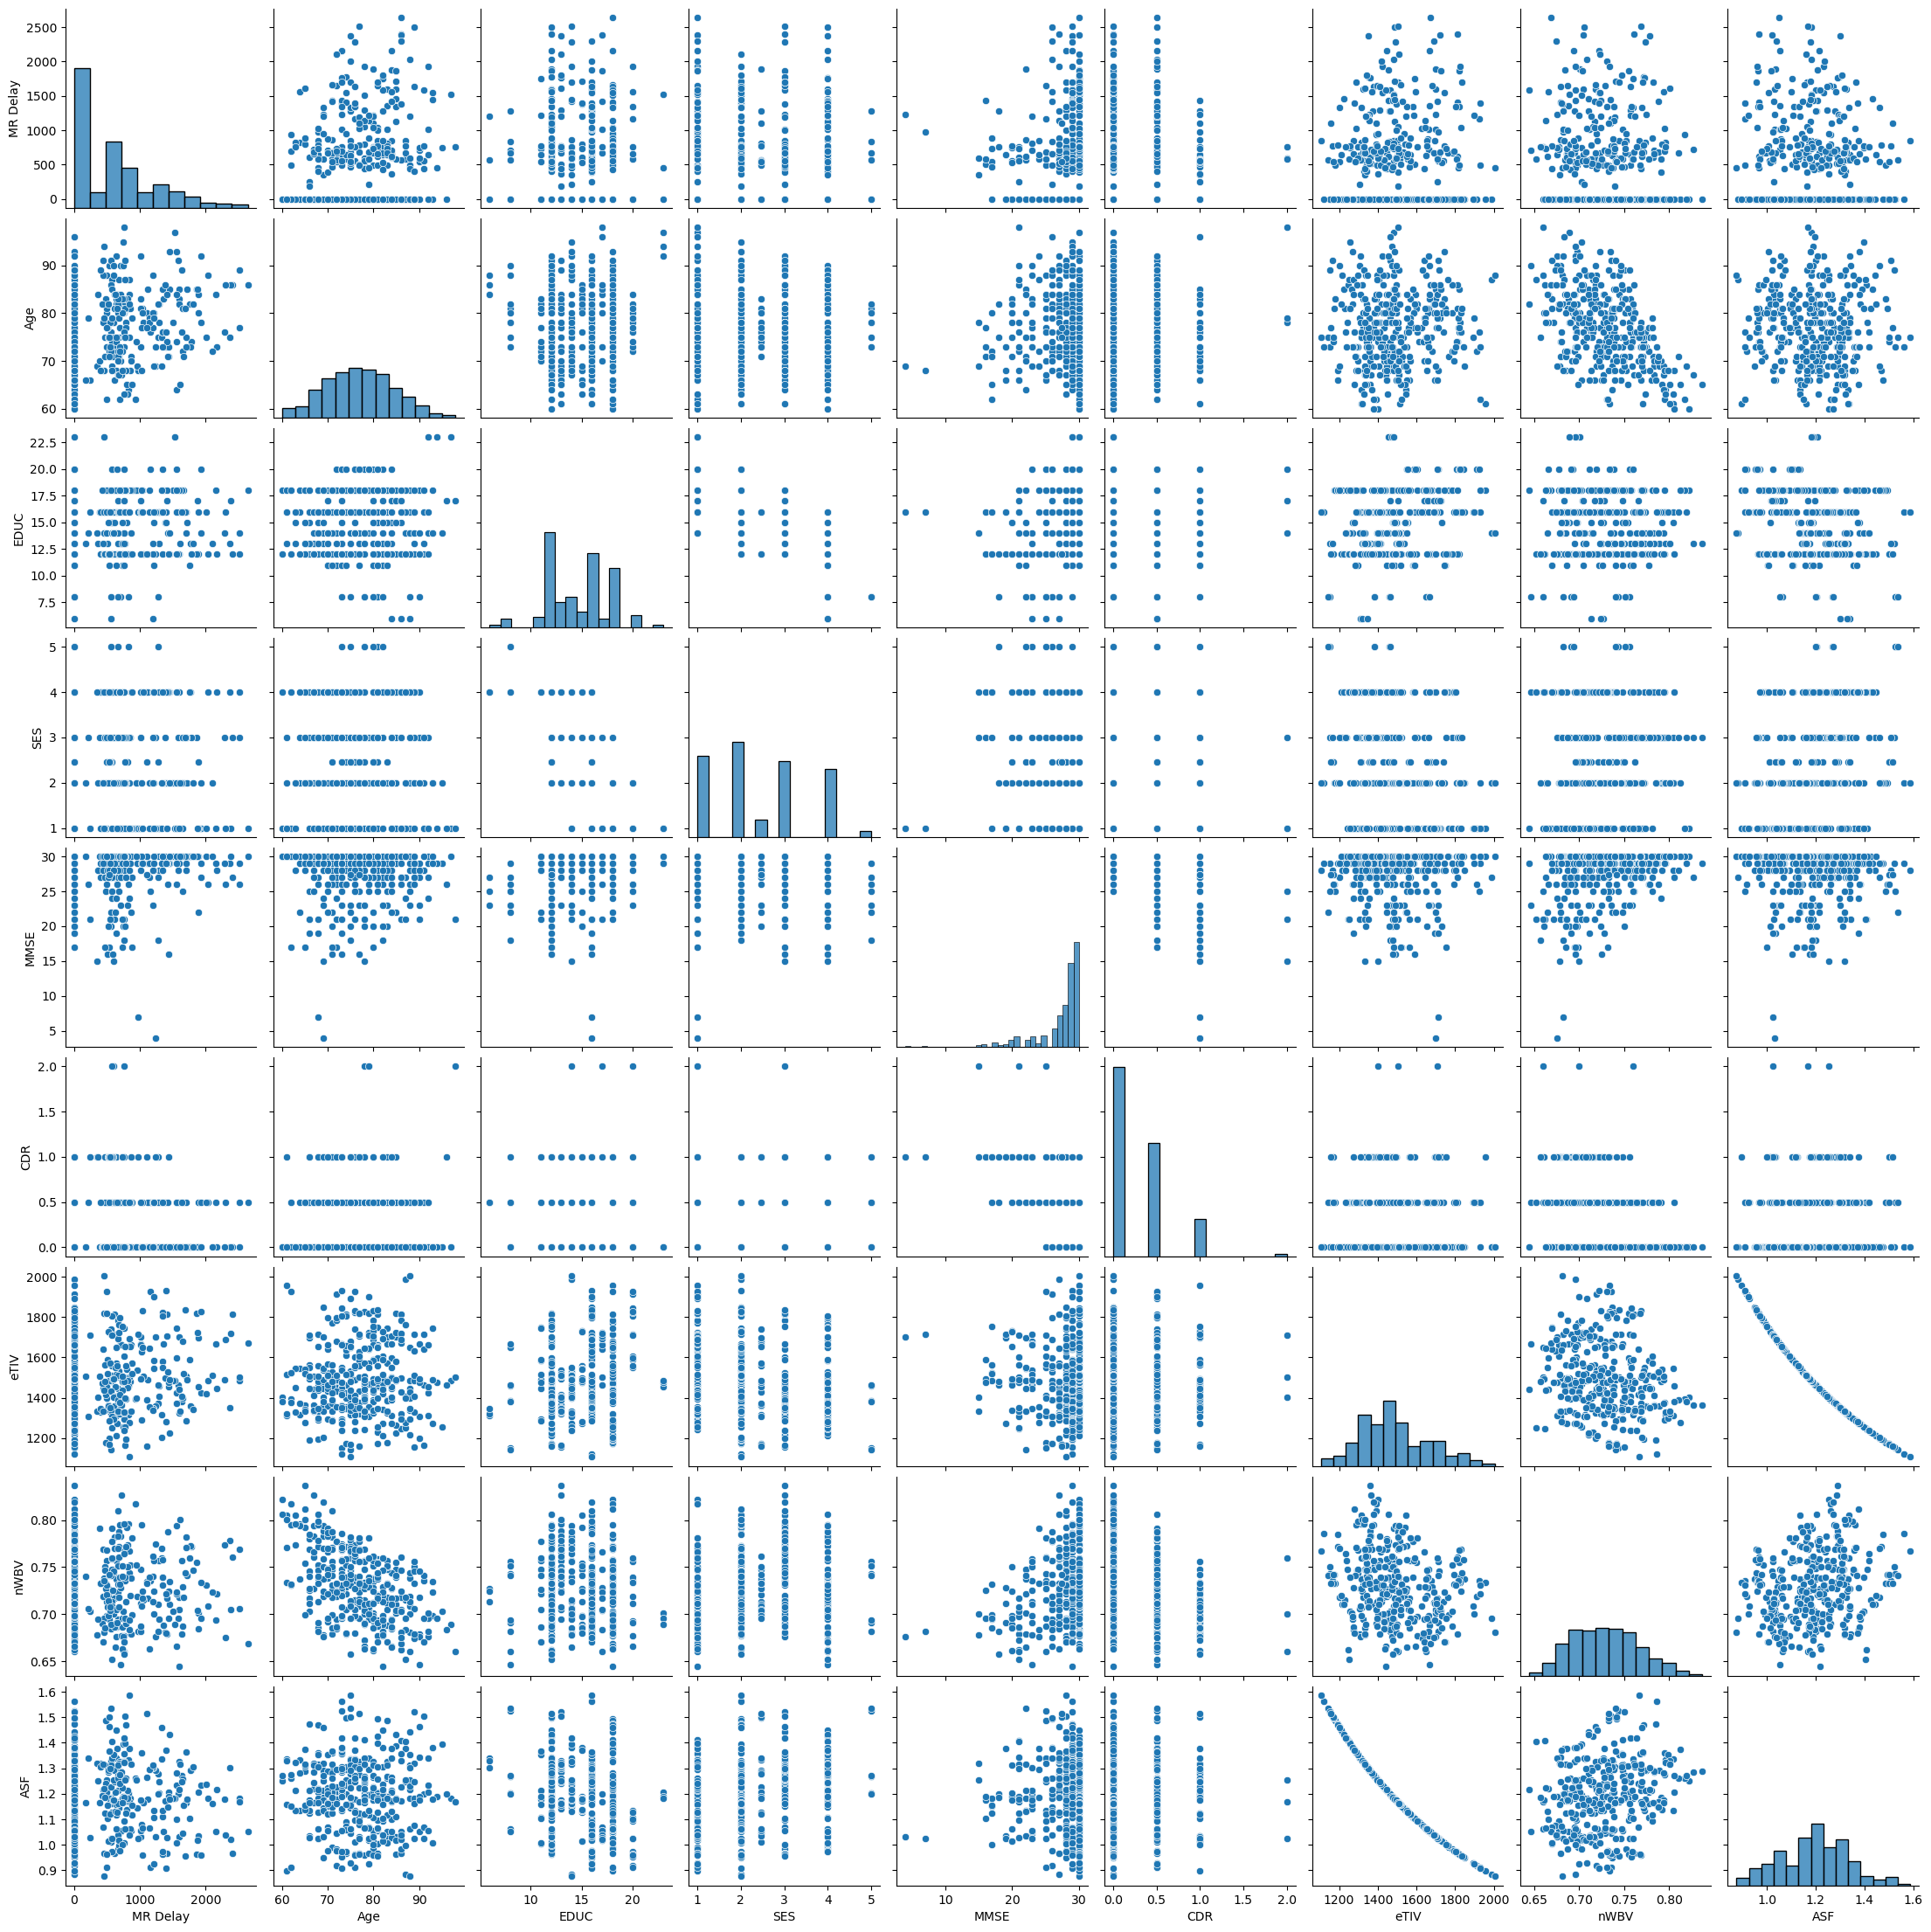

In [15]:
sns.pairplot(long_data)

**Check correlation among the attributes w.r.t the dependent variable**

<AxesSubplot:>

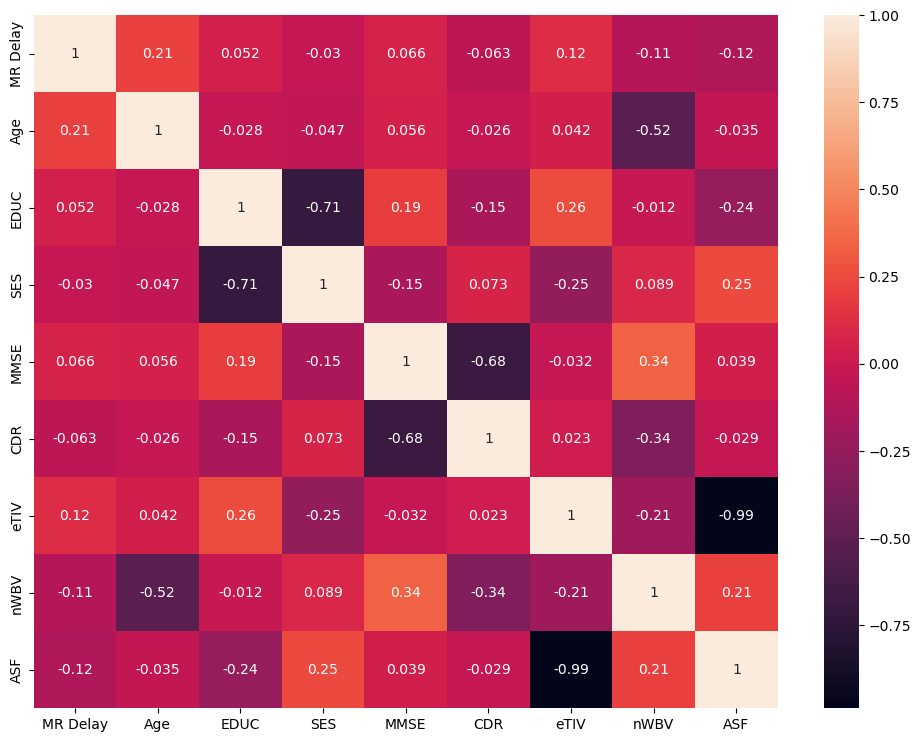

In [16]:
corr_obj = long_data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr_obj, xticklabels=corr_obj.columns.values, yticklabels=corr_obj.columns.values, annot=True)

In [17]:
long_data["Gender"] = np.where(long_data["Gender"]=="F", 1, 0)
long_data["Group"] = np.where(long_data["Group"] == 'Demented', 1, 0)

In [18]:
long_data.head(5)

,Group,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,457,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,0,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,560,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,1895,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034


**Train_test_split**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = long_data.iloc[:, 1:]
Y = long_data.iloc[:,0:1]

sc = StandardScaler()
X_transformed = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size = 0.20, random_state = 42)

**Models**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  

#model objects
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
gb_model = GradientBoostingClassifier()
nb_model = GaussianNB()
svc_model = SVC()

#model training
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

SVC()

**SCORES**

In [21]:
print("Random Forest Classifier : {:.2%}".format(rf_model.score(X_test, y_test)))
print("Logistic Regression : {:.2%}".format(lr_model.score(X_test, y_test)))
print("Gradient Boosting Classifier : {:.2%}".format(gb_model.score(X_test, y_test)))
print("Naive Bayes Classifier : {:.2%}".format(nb_model.score(X_test, y_test)))
print("SVC Classifier : {:.2%}".format(svc_model.score(X_test, y_test)))

Random Forest Classifier : 97.33%
Logistic Regression : 96.00%
Gradient Boosting Classifier : 96.00%
Naive Bayes Classifier : 97.33%
SVC Classifier : 94.67%


In [22]:
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)
#print(predictions)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Random Forest Classifier : {:.2%}".format(accuracy_score(y_test, rf_predictions)))
print("Logistic Regression : {:.2%}".format(accuracy_score(y_test, lr_predictions)))
print("Gradient Boosting Classifier : {:.2%}".format(accuracy_score(y_test, gb_predictions)))
print("Naive Bayes Classifier : {:.2%}".format(accuracy_score(y_test, nb_predictions)))
print("SVC Classifier : {:.2%}".format(accuracy_score(y_test, svc_predictions)))

Random Forest Classifier : 97.33%
Logistic Regression : 96.00%
Gradient Boosting Classifier : 96.00%
Naive Bayes Classifier : 97.33%
SVC Classifier : 94.67%
